In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
import numpy as np

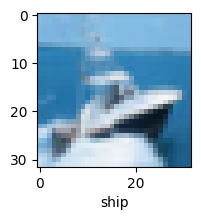

In [8]:
#Pull the Dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (5,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 8)


In [14]:
#Normalizing the training data
X_train = X_train / 255.0
#Normalizing the testing data to test it out later
X_test = X_test / 255.0

In [15]:
#Creating a ANN
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.8141 - accuracy: 0.3544
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.6251 - accuracy: 0.4261
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.5427 - accuracy: 0.4557
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4817 - accuracy: 0.4791
Epoch 5/10
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4328 - accuracy: 0.4960
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.3870 - accuracy: 0.5121
Epoch 7/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.3505 - accuracy: 0.5251
Epoch 8/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3162 - accuracy: 0.5359
Epoch 9/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.2820 - accuracy: 0.5481
Epoch 10/10
1563/1563 [==============================] - 101s 64

In [22]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
print("Test Accuracy: {}%".format(accuracy_score(y_test,y_pred_classes)*100))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.35      0.47      1000
           1       0.44      0.82      0.57      1000
           2       0.53      0.12      0.20      1000
           3       0.30      0.51      0.37      1000
           4       0.51      0.35      0.41      1000
           5       0.50      0.21      0.30      1000
           6       0.41      0.76      0.53      1000
           7       0.84      0.35      0.49      1000
           8       0.45      0.80      0.57      1000
           9       0.62      0.33      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.53      0.46      0.44     10000
weighted avg       0.53      0.46      0.44     10000

Test Accuracy: 45.97%


In [24]:
#Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    # First Conv layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    # Second Conv layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Fully Connected classifier
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4902 - accuracy: 0.4644
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1369 - accuracy: 0.6005
Epoch 3/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9911 - accuracy: 0.6557
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8995 - accuracy: 0.6863
Epoch 5/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8316 - accuracy: 0.7113


In [27]:
cnn.evaluate(X_test,y_test)

y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))
print("Test Accuracy: {}%".format(accuracy_score(y_test,y_pred_classes)*100))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.70      0.74      1000
           1       0.82      0.81      0.82      1000
           2       0.65      0.46      0.54      1000
           3       0.46      0.59      0.52      1000
           4       0.63      0.57      0.60      1000
           5       0.62      0.55      0.58      1000
           6       0.70      0.80      0.75      1000
           7       0.64      0.81      0.72      1000
           8       0.77      0.81      0.79      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

Test Accuracy: 68.30000000000001%
